In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

   # $2.4.1$ Mô tả về bộ dữ liệu 
      Bộ dữ liệu là bảng đánh giá chất lượng cơ sở vật chất của các sinh viên của trường Đại học Công nghiệp Thành phố Hồ Chí Minh (IUH) về các tiện ích và cơ sở vật chất của trường. Bảng dữ liệu bao gồm 10 câu hỏi với các tiêu chí đánh giá khác nhau, được đánh giá trên thang điểm từ 1 đến 5. Mỗi hàng trong bảng dữ liệu đại diện cho một sinh viên của trường IUH và điểm số của họ cho mỗi tiêu chí được cung cấp. Chúng em thực hiện khảo sát nhằm trả lời cho hai câu hỏi chính mà tụi em đã đặt vấn đề:
      1. Điều gì là quan trọng nhất đối với sinh viên khi đánh giá cơ sở vật chất của trường đại học?
      2. Cơ sở vật chất (CSVC) của trường có thật sự đáp ứng đủ nhu cầu cho sinh viên theo học tại trường ?

In [3]:
df = pd.read_csv("Bai2.csv")
# Lọc ra các cột có tên bắt đầu bằng "Unnamed"
cols_to_drop = df.filter(regex='^Unnamed').columns
# Xóa các cột đó khỏi DataFrame
df = df.drop(cols_to_drop, axis=1)
df.head()

,Họ và tên,Mã sinh viên,Câu 1,Câu 2,Câu 3,Câu 4,Câu 5,Câu 6,Câu 7,Câu 8,Câu 9,Câu 10
0,Trần Thị Ly Na,21066771,5,4,2,4,2,3,3,4,3,4
1,Trần Diệu Huyền,22682421,4,4,3,3,4,3,3,4,4,3
2,Nguyễn Thị Lan Anh,21109571,5,5,4,4,3,3,3,4,4,4
3,Nguyễn Văn Phong,21002815,3,3,2,3,2,1,3,3,3,3
4,Đinh Nguyên Chung,21127891,4,4,2,4,3,3,3,3,4,4


# $2.4.2$ THỰC HIỆN CÁC THỐNG KÊ CƠ BẢN

    * Thông tin về bộ dữ liệu

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Họ và tên     51 non-null     object
 1   Mã sinh viên  51 non-null     int64 
 2   Câu 1         51 non-null     int64 
 3   Câu 2         51 non-null     int64 
 4   Câu 3         51 non-null     int64 
 5   Câu 4         51 non-null     int64 
 6   Câu 5         51 non-null     int64 
 7   Câu 6         51 non-null     int64 
 8   Câu 7         51 non-null     int64 
 9   Câu 8         51 non-null     int64 
 10  Câu 9         51 non-null     int64 
 11  Câu 10        51 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 4.9+ KB


* Các thống kê căn bản : trung bình, độ lệch chuẩn, min , max

In [36]:
df.iloc[2:12, 2:12].describe()

,Câu 1,Câu 2,Câu 3,Câu 4,Câu 5,Câu 6,Câu 7,Câu 8,Câu 9,Câu 10
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.800000,3.600000,2.70000,3.600000,3.000000,2.300000,2.900000,3.200000,3.400000,3.400000
std,0.788811,0.843274,1.05935,0.699206,0.942809,0.948683,0.567646,0.788811,0.516398,0.699206
min,3.000000,3.000000,2.00000,3.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000
25%,3.000000,3.000000,2.00000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,2.00000,3.500000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,3.00000,4.000000,3.750000,3.000000,3.000000,3.000000,4.000000,3.750000
max,5.000000,5.000000,5.00000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000


* Tính phương sai

In [6]:
#Tính phương sai
var_values = df.iloc[2:12, 2:12].var()
print("Variance values :\n",round(var_values,2))

Variance values :
 Câu 1     0.62
Câu 2     0.71
Câu 3     1.12
Câu 4     0.49
Câu 5     0.89
Câu 6     0.90
Câu 7     0.32
Câu 8     0.62
Câu 9     0.27
Câu 10    0.49
dtype: float64


 THỐNG KÊ VỀ SỐ CÂU TRẢ LỜI

* Đếm số lượng câu trả lời có giá trị là "1" , "2", "3", "4", "5" tương đương với các giá trị "Rất tệ", "Tệ", "Bình thường", "Tốt", "Rất tốt"
*  Biểu đồ cột thống kê số lượng câu trả lời

Số câu trả lời 'Rất tệ' là:  17
Số câu trả lời 'Tệ' là:  61
Số câu trả lời 'Bình thường' là:  217
Số câu trả lời 'Tốt' là:  192
Số câu trả lời 'Rất tổt' là:  23


C:\Users\cupho\AppData\Local\Temp\ipykernel_16192\1395034160.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


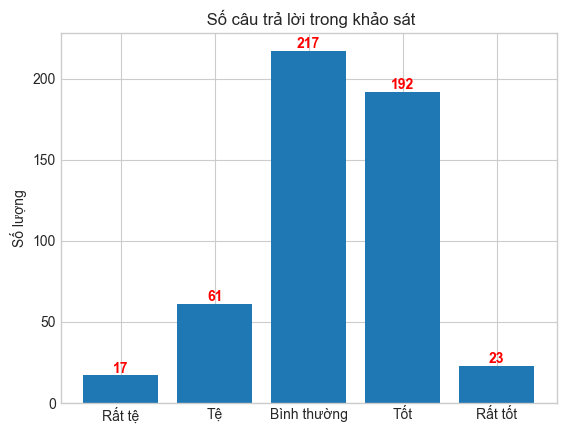

In [15]:
asw1_counts = (df == 1).sum().sum()
print("Số câu trả lời 'Rất tệ' là: ", asw1_counts)
asw2_counts = (df == 2).sum().sum()
print("Số câu trả lời 'Tệ' là: ", asw2_counts)
asw3_counts = (df == 3).sum().sum()
print("Số câu trả lời 'Bình thường' là: ", asw3_counts)
asw4_counts = (df == 4).sum().sum()
print("Số câu trả lời 'Tốt' là: ", asw4_counts)
asw5_counts = (df == 5).sum().sum()
print("Số câu trả lời 'Rất tổt' là: ", asw5_counts)

count_answers = {"Rất tệ":asw1_counts,
                 "Tệ": asw2_counts,
                 "Bình thường":  asw3_counts,
                 "Tốt": asw4_counts,
                 "Rất tốt": asw5_counts
                 }
plt.style.available
plt.style.use('seaborn-whitegrid')
fig,ax =plt.subplots()
ax.bar(count_answers.keys(),count_answers.values());
ax.set(title = " Số câu trả lời trong khảo sát", ylabel ="Số lượng");
# Hiển thị giá trị trên mỗi cột
for i, v in enumerate(count_answers.values()):
    ax.text(i, v, str(v), color='red', fontweight='bold', ha='center', va='bottom')



# $2.4.3$  Mối tương quan giữa các câu hỏi khảo sát và kết quả
* Tính hệ số tương quan giữa các câu hỏi

In [4]:
cereal_corr = df.iloc[:, 2:12].corr()
cereal_corr

,Câu 1,Câu 2,Câu 3,Câu 4,Câu 5,Câu 6,Câu 7,Câu 8,Câu 9,Câu 10
Câu 1,1.000000,0.706740,0.450371,0.428121,0.210833,0.427806,0.430305,0.537566,0.434590,0.665344
Câu 2,0.706740,1.000000,0.322847,0.380389,0.221474,0.282960,0.460207,0.409849,0.310402,0.440073
Câu 3,0.450371,0.322847,1.000000,0.155243,0.405960,0.526909,0.505611,0.415793,0.316268,0.527676
Câu 4,0.428121,0.380389,0.155243,1.000000,0.321992,0.301209,0.386644,0.347854,0.326612,0.337901
Câu 5,0.210833,0.221474,0.405960,0.321992,1.000000,0.441738,0.224152,0.216046,0.201431,0.383656
Câu 6,0.427806,0.282960,0.526909,0.301209,0.441738,1.000000,0.517016,0.441114,0.547512,0.683955
Câu 7,0.430305,0.460207,0.505611,0.386644,0.224152,0.517016,1.000000,0.572171,0.452468,0.571677
Câu 8,0.537566,0.409849,0.415793,0.347854,0.216046,0.441114,0.572171,1.000000,0.490356,0.575269
Câu 9,0.434590,0.310402,0.316268,0.326612,0.201431,0.547512,0.452468,0.490356,1.000000,0.670369
Câu 10,0.665344,0.440073,0.527676,0.337901,0.383656,0.683955,0.571677,0.575269,0.670369,1.000000


* Biểu diễn mối tương quan bằng biểu đồ cột

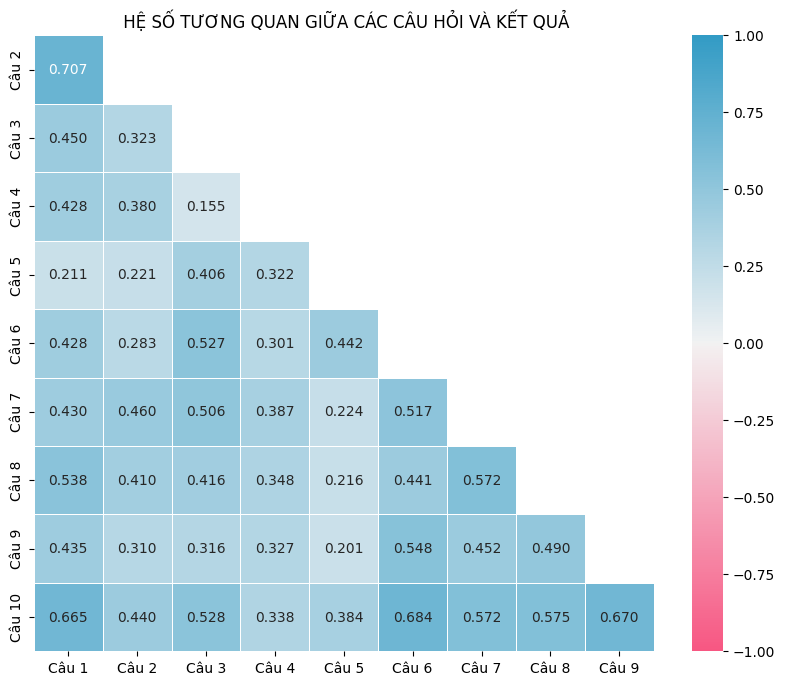

In [5]:
ones_corr = np.ones_like(cereal_corr,dtype = bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]

adjusted_cereal_corr = cereal_corr.iloc[1:, :-1]
fig, ax = plt.subplots(figsize =(10,8))
cmap = sns.diverging_palette(0,230,90,60,as_cmap = True)
ax.set(title = " HỆ SỐ TƯƠNG QUAN GIỮA CÁC CÂU HỎI VÀ KẾT QUẢ");
sns.heatmap(data =adjusted_cereal_corr, mask = adjusted_mask,
            annot =True, fmt =".3f",cmap = cmap,
            vmin = -1, vmax =1,
            linecolor ="white", linewidths = 0.5);



Dựa vào ma trận hệ số tương quan, chúng em đưa ra nhận xét về mối quan hệ giữa các câu hỏi liên quan đến cơ sở vật chất của Trường Đại học Công nghiệp Thành phố Hồ Chí Minh (IUH):

    * Câu 1 và câu 7 có hệ số tương quan cao (0.706740 và 0.665344), cho thấy có một mối liên hệ chặt chẽ giữa CSVC của trường và số tiền học phí mà sinh viên phải trả. Nếu trường có đáp ứng đầy đủ CSVC, thì học phí sẽ cao hơn.
    * Câu 4 và câu 9 có hệ số tương quan trung bình (0.527676), cho thấy việc thư viện cung cấp đủ tài liệu và cơ sở vật chất của trường là các yếu tố quan trọng đối với chất lượng giảng dạy và học tập của sinh viên.
    * Câu 2, câu 3, câu 5, câu 6, và câu 8 có hệ số tương quan thấp (thấp hơn 0.5), cho thấy các yếu tố này không ảnh hưởng quá nhiều đến chất lượng giảng dạy và học tập của sinh viên

# $2.4.4$ Xác định yếu tố quan trọng đến kết quả 

Để rút ra kết luận về yếu tố nào ảnh hưởng đến kết quả, chúng em xem xét các giá trị hệ số tương quan để đánh giá mức độ tương quan giữa các biến số.

* Các câu hỏi về cơ sở vật chất như Câu 1, Câu 2 và Câu 5 có hệ số tương quan thấp với các câu hỏi khác, cho thấy chúng không có tương quan mạnh với kết quả tổng thể. Tuy nhiên, Câu 1 và Câu 2 có hệ số tương quan cao với nhau, cho thấy rằng trường có thể đã đáp ứng đầy đủ CSVC cho sinh viên trong các phòng học.

* Câu 3, Câu 4 và Câu 7 có hệ số tương quan trung bình với các câu hỏi khác, cho thấy rằng nhà để xe, thư viện và đánh giá CSVC so với học phí đóng vai trò quan trọng hơn đối với chất lượng tổng thể của trường.

* Các câu hỏi về mạng wifi và cơ sở vật chất, bao gồm Câu 6, Câu 8 và Câu 9, có hệ số tương quan trung bình đến cao với các câu hỏi khác, cho thấy rằng chất lượng mạng wifi và cơ sở vật chất của trường có ảnh hưởng đáng kể đến kết quả.

Tổng thể, Câu 10 là câu hỏi đánh giá chung về CSVC của trường. Hệ số tương quan của Câu 10 với các câu hỏi khác rất cao, cho thấy rằng câu 10 cũng chính là yếu tố ảnh hưởng đến kết quả.


# $2.4.5$ Trực quan hóa dữ liệu 


    " Điều gì là quan trọng nhất đối với sinh viên khi đánh giá cơ sở vật chất của trường đại học ?"

* Để kiểm tra xem có những yếu tố nào quan trọng nhất đối với sinh viên để làm thước đo đánh giá cơ sở vật chất của 1 trường đại học , chúng em lấy một số yếu tố phổ biến mà mỗi trường đại học đều có , đếm số giá trị riêng biệt "1", "2", "3", "4", "5" tương ứng với các đánh giá "Rất tệ", "Tệ", "Bình thường", "Tốt", "Rất tốt", cụ thể là: 

1. NHÀ XE

    Câu 3. Bạn cảm thấy nhà xe của trường có đáp ứng nhu cầu gửi xe của sinh viên không ?

In [9]:
#Đếm số lượng các câu riêng biệt trong câu 3
count_3 = df['Câu 3'].value_counts()
count_3

3    19
2    15
4     9
1     6
5     2
Name: Câu 3, dtype: int64

Số câu trả lời : Rất tệ: 6 , Tệ: 15 , Bình thường: 19, Tốt : 9 , Rất tốt: 2

2. THƯ VIỆN

    Câu 4. Thư viện có cung cấp đủ thiết bị và tài liệu đáp ứng nhu cầu học tập của sinh viên ?

In [10]:
#Đếm số lượng các câu riêng biệt trong câu 4
count_4 = df['Câu 4'].value_counts()
count_4

4    26
3    15
5     7
2     3
Name: Câu 4, dtype: int64

Số câu trả lời :   Rất tệ: 0 , Tệ: 3 , Bình thường: 15, Tốt : 26,  Rất tốt: 7

3. THANG MÁY

    Câu 5. Chất lượng thang máy của trường như thế nào trong quá trình vận hành ?

In [11]:
#Đếm số lượng các câu riêng biệt trong câu 5
count_5 = df['Câu 5'].value_counts()
count_5

3    26
4    19
2     4
1     1
5     1
Name: Câu 5, dtype: int64

Số câu trả lời :Rất tệ: 1 , Tệ: 4 , Bình thường: 26, Tốt : 19, Rất tốt: 1

4. MẠNG INTERNET

    Câu 6. Mạng wifi của trường có đủ mạnh để sinh viên truy cập và sử dụng ?

In [12]:
#Đếm số lượng các câu riêng biệt trong câu 6
count_6 = df['Câu 6'].value_counts()
count_6

3    21
2    17
1     9
4     3
5     1
Name: Câu 6, dtype: int64

Số câu trả lời : Rất tệ: 9  , Tệ: 17  , Bình thường: 21  , Tốt : 3  , Rất tốt: 1

* Vẽ biểu đồ thống kê các yếu tố trên:

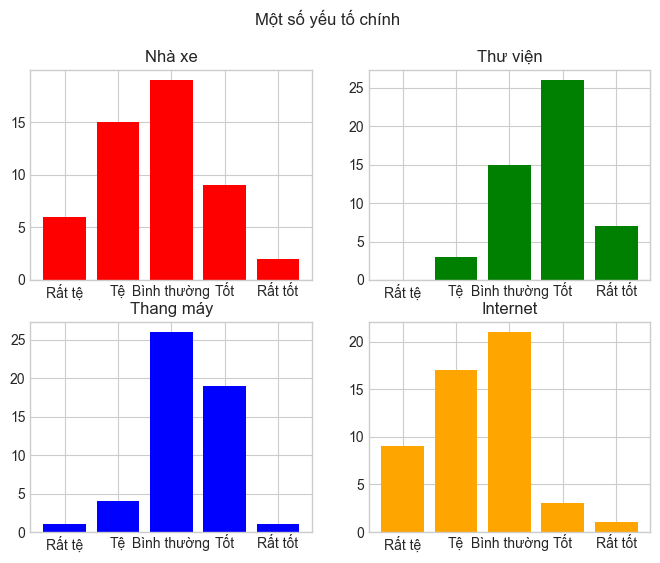

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu 
x = ['Rất tệ', 'Tệ', 'Bình thường', 'Tốt', 'Rất tốt']
y1 = [6, 15, 19, 9, 2]
y2 = [0, 3, 15, 26, 7]
y3 = [1, 4, 26, 19, 1]
y4 = [9, 17, 21, 3, 1]

# Chia thành 4 biểu đồ con
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Vẽ biểu đồ cột trong từng phần của bảng đồ
axs[0, 0].bar(x, y1, color='red')
axs[0, 1].bar(x, y2, color='green')
axs[1, 0].bar(x, y3, color='blue')
axs[1, 1].bar(x, y4, color='orange')

# Tùy chỉnh biểu đồ
axs[0, 0].set_title('Nhà xe')
axs[0, 1].set_title('Thư viện')
axs[1, 0].set_title('Thang máy')
axs[1, 1].set_title('Internet')
plt.suptitle('Một số yếu tố chính ')

plt.show()


* Từ biểu đồ trên , chúng em rút ra được một số kết luận :

    * Thư viện và thang máy được đánh giá rất cao, cho thấy cơ sở vật chất liên quan đến học tập và đi lại của sinh viên tại trường đại học này đang được đánh giá rất tích cực và sẽ cần được phát huy thêm để đáp ứng nhu cầu của sinh viên.
    * Bên cạnh đó, vẫn còn một số hạ tầng cơ sở vật chất như bãi đỗ xe và internet cần được cải thiện để đáp ứng nhu cầu sử dụng của sinh viên. 

    "Cơ sở vật chất (CSVC) của trường có thật sự đáp ứng nhu cầu cho sinh viên theo học tại trường ?"

* Để trả lời cho câu hỏi này , chúng em có đặt 1 câu hỏi khảo sát ở cuối cùng để đánh giá chung về cơ sở vật chất của trường:

        "10. Đánh giá chung về cơ sở vật chất của trường"

* Chúng em đếm số lượng các câu trả lời ở câu 10

In [15]:
#Đếm số lượng các câu riêng biệt trong câu 10
count_10 = df['Câu 10'].value_counts()
count_10

4    24
3    20
2     6
5     1
Name: Câu 10, dtype: int64

Số câu trả lời: Rất tệ : 0; Tệ: 6 ; Bình thường: 20, Tốt :24, Rất tốt: 1

* Sau khi đếm số lượng , chúng em trực quan hóa dữ liệu thống kê được bằng biểu đồ cột

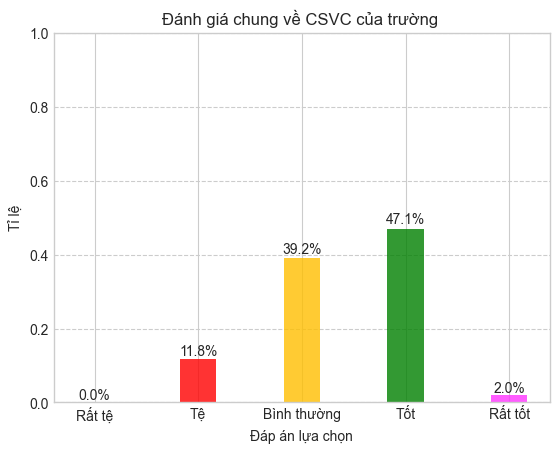

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x_10 = ['Rất tệ', 'Tệ', 'Bình thường', 'Tốt', 'Rất tốt']
y_10 = [0, 6, 20 ,24, 1]

# Tính tổng số lượng
total = sum(y_10)

# Tính tỉ lệ phần trăm của từng cột
ratios = [y / total for y in y_10]

# Chọn màu sắc cho các cột
colors = ['#d65f5f', 'red', '#ffbf00', 'green', '#FF33FF']

# Tạo biểu đồ cột
fig, ax = plt.subplots()
index = np.arange(len(x_10))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, ratios, bar_width,
                alpha=opacity,
                color=colors,
                label='Đánh giá sản phẩm')

# Thêm các text để hiển thị giá trị trên cột
for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
            f"{ratios[i]*100:.1f}%", ha='center', va='bottom')

# Đặt tên cho trục x và trục y
ax.set_xlabel('Đáp án lựa chọn')
ax.set_ylabel('Tỉ lệ')

# Đặt tên cho các label trên trục x
ax.set_xticks(index)
ax.set_xticklabels(x_10)

# Đặt giới hạn cho trục y
ax.set_ylim([0, 1])

# Thêm grid lines cho biểu đồ
ax.grid(axis='y', linestyle='--')

# Thêm tiêu đề cho biểu đồ
ax.set_title('Đánh giá chung về CSVC của trường ')

# Hiển thị biểu đồ
plt.show()


* Dựa vào số liệu trên, chúng ta có thể thấy rằng tỉ lệ đánh giá về cơ sở vật chất của trường đại học Công nghiệp thành phố Hồ Chí Minh khá tích cực. Hầu hết các sinh viên đánh giá trường đại học có cơ sở vật chất từ "Bình thường" đến "Tốt" ,chiếm lần lượt là 39.2% và 47.1%, có 2% đánh giá "Rất tốt", không có đánh giá rất tệ nào được đưa ra. 
* Chúng em đưa ra kết luận rằng cơ sở vật chất của trường đại học Công Nghiệp TP.Hồ Chí Minh thật sự ĐÁP ỨNG ĐƯỢC nhu cầu của sinh viên theo học tại trường .